Вы предобработали данные в SQL, и теперь они готовы для проверки гипотезы в Python. Загрузите данные пользователей из Москвы и Санкт-Петербурга c суммой часов их активности из файла yandex_knigi_data.csv. Если работаете локально, скачать файл можно по ссылке.

Проверьте наличие дубликатов в идентификаторах пользователей. Сравните размеры групп, их статистики и распределение.

Напомним, как выглядит гипотеза: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

Нулевая гипотеза $H_0: \mu_{\text{СПб}} \leq \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге не больше, чем в Москве.

Альтернативная гипотеза $H_1: \mu_{\text{СПб}} > \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

По результатам анализа данных подготовьте аналитическую записку, в которой опишите:

Выбранный тип t-теста и уровень статистической значимости.

Результат теста, или p-value.

Вывод на основе полученного p-value, то есть интерпретацию результатов.

Одну или две возможные причины, объясняющие полученные результаты.

## Проверка гипотезы в Python и составление аналитической записки
 
- Автор: Смирнов Александр Викторович
- Дата: 27.05.2025

## Цели и задачи проекта

Оценка различия среднего времени активности пользователей приложения из двух крупнейших городов России — Санкт-Петербурга и Москвы. Основной целью является проверка предположения о том, что пользователи из Санкт-Петербурга тратят больше времени на чтение и прослушивание книг в приложении, чем пользователи из Москвы.



## Описание данных
Используются данные по активности пользователей мобильного приложения чтения и прослушивания аудиокниг. Основные характеристики набора данных включают:

- Уникальные идентификаторы пользователей.
- Город проживания пользователя («Санкт-Петербург», «Москва»).
- Время активности пользователя в приложении (например, количество минут).

## Содержимое проекта

<font color='#777778'>Перечислите основные шаги проекта или напишите оглавление. Используйте описание проекта, чтобы зафиксировать основные шаги.</font>

---

## 1. Загрузка данных и знакомство с ними

Загрузите данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `yandex_knigi_data`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import mannwhitneyu, ttest_ind
from statsmodels.stats.proportion import proportions_ztest



In [ ]:
df = pd.read_csv("yandex_knigi_data")

df = df.drop(columns= 'Unnamed: 0')

In [3]:
df.head()

,city,puid,hours
0,Москва,9668,26.167776
1,Москва,16598,82.111217
2,Москва,80401,4.656906
3,Москва,140205,1.840556
4,Москва,248755,151.326434


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    8784 non-null   object 
 1   puid    8784 non-null   int64  
 2   hours   8784 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.0+ KB


In [5]:
df['hours'].describe()

count    8784.000000
mean       11.087670
std        37.701350
min         0.000018
25%         0.066246
50%         0.942344
75%         6.065151
max       978.764775
Name: hours, dtype: float64

In [6]:
(pd.DataFrame({'Количество пропусков': df.isnull().sum(), 'Доля пропусков': df.isnull().mean().round(4), 'Количество дубликатов': df.duplicated().sum()}).style.background_gradient(cmap='coolwarm'))

,Количество пропусков,Доля пропусков,Количество дубликатов
city,0,0.000000,0
puid,0,0.000000,0
hours,0,0.000000,0


По обзору данных, пропуском и дубликатов нет. Можно работать.

## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

In [7]:
msk_a = df[df['city'] == 'Москва']
spb_b = df[df['city'] == 'Санкт-Петербург']

msk_a_nun = msk_a.groupby('city', as_index= False)['hours'].mean()
spb_b_nun = spb_b.groupby('city', as_index= False)['hours'].mean()

In [8]:
int_set = list(set(msk_a['puid']) & set(spb_b['puid']))

print(f'Пользователи из обоих групп: {len(int_set)}')

Пользователи из обоих групп: 244


In [9]:
msk_a_cleaned = msk_a.copy()
mask_msk = ~msk_a['puid'].astype(int).isin(int_set)

msk_a_cleaned['puid'] = msk_a_cleaned['puid'][mask_msk]

msk_a_cleaned = msk_a_cleaned.dropna()

In [10]:
spb_b_cleaned = spb_b.copy()
mask_spb = ~spb_b['puid'].astype(int).isin(int_set)

spb_b_cleaned['puid'] = spb_b_cleaned['puid'][mask_spb]

spb_b_cleaned = spb_b_cleaned.dropna()

In [11]:
msk_cleaned_nun = msk_a_cleaned.groupby('city', as_index= False)['hours'].mean()
spb_cleaned_nun = spb_b_cleaned.groupby('city', as_index= False)['hours'].mean()

In [12]:
int_set_cleaned  = list(set(msk_a_cleaned['puid']) & set(spb_b_cleaned['puid']))

print(f'Пользователи из обоих групп: {len(int_set_cleaned)}')

Пользователи из обоих групп: 0


In [13]:
print(f"Среднее время прослушивания группы А: {round(msk_a_nun.at[0, 'hours'], 2)}")

print(f"Среднее время прослушивания группы В: {round(spb_b_nun.at[0, 'hours'], 2)}")

Среднее время прослушивания группы А: 10.88
Среднее время прослушивания группы В: 11.59


In [14]:
print(f"Среднее время прослушивания группы А, без пересечений: {round(msk_cleaned_nun.at[0, 'hours'], 2)}")

print(f"Среднее время прослушивания группы В, без пересечений: {round(spb_cleaned_nun.at[0, 'hours'], 2)}")

Среднее время прослушивания группы А, без пересечений: 10.85
Среднее время прослушивания группы В, без пересечений: 11.26


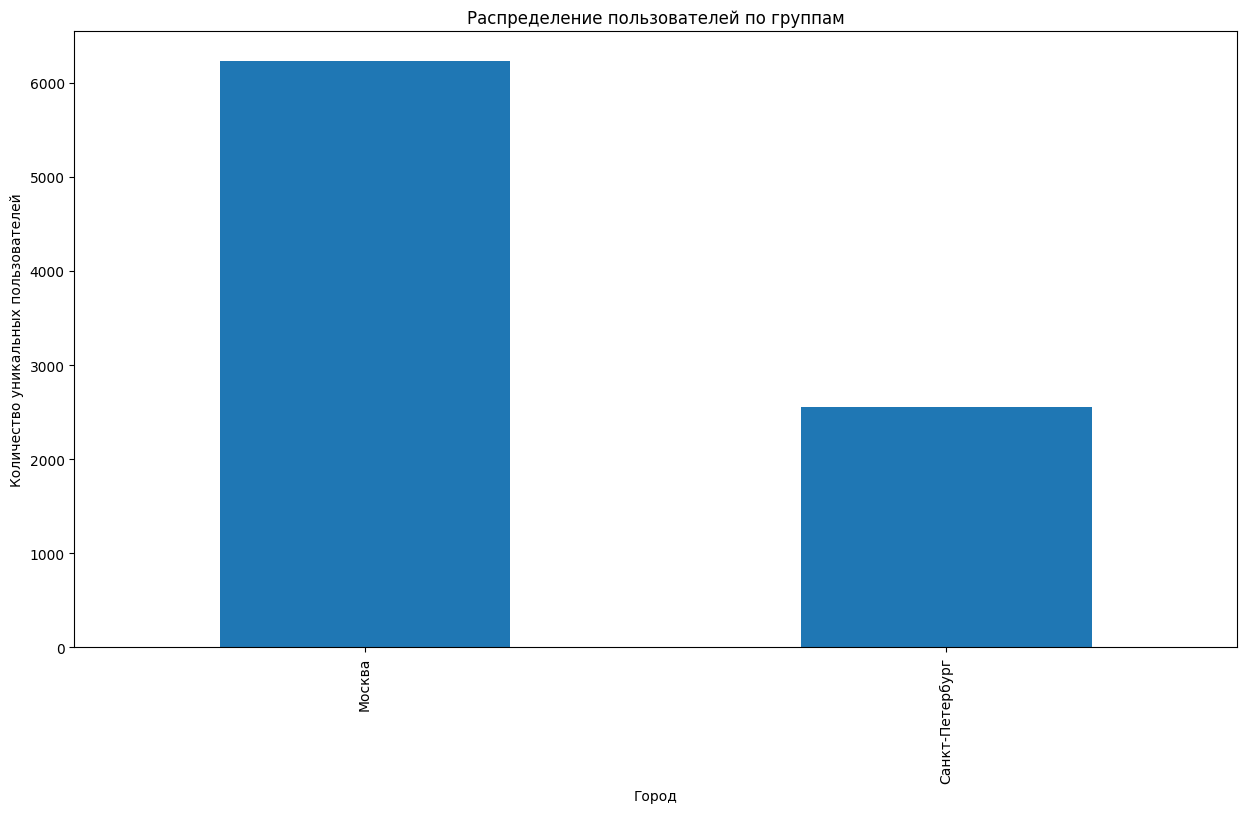

In [15]:
daily_users = df.groupby(['city'])['puid'].nunique()

daily_users.plot(kind='bar', figsize=(15, 8))

plt.title('Распределение пользователей по группам')
plt.xlabel('Город')  
plt.ylabel('Количество уникальных пользователей')   

plt.show()


Без учета возможных пересекающихся пользователей, среднее время прослушивания незначительно меняется:
- Для группы A среднее время снижается до 10.85 минут.
- Для группы B среднее время уменьшается до 11.26 минут.

Таким образом, мы видим незначительное снижение средних значений, однако общее соотношение остается примерно таким же: пользователи группы B слушают музыку немного дольше, чем пользователи группы A. Данный промежуточный вывод помогает лучше понять поведение слушателей обеих групп и подготовить почву для дальнейшего анализа влияния различных факторов на продолжительность прослушивания.

График  наглядно демонстрирует, что группа пользователей из Москвы значительно превосходит по количеству группу пользователей из Санкт-Петербурга. Это может быть связано с различными факторами, такими как размер города, уровень активности пользователей или другие демографические особенности.

----

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

In [16]:
statistic, p_value = ttest_ind(msk_a_cleaned['hours'], spb_b_cleaned['hours'], alternative= 'greater')

print(f'p-значение: {p_value:.4f}')

if p_value > 0.05:
    print("Средние время активности пользователей  в двух выборках существенно не различаются.")
else:
    print("Есть основания считать, что среднее время активности пользователей в Санкт-Петербурге действительно больше, чем в Москве.")

p-значение: 0.6736
Средние время активности пользователей  в двух выборках существенно не различаются.


## 3. Аналитическая записка
По результатам анализа данных подготовьте аналитическую записку, в которой опишете:

- Выбранный тип t-теста и уровень статистической значимости.

- Результат теста, или p-value.

- Вывод на основе полученного p-value, то есть интерпретацию результатов.

- Одну или две возможные причины, объясняющие полученные результаты.



## Аналитическая записка

### Тип выбранного t-теста и уровень статистической значимости
Для сравнения средних значений между двумя независимыми группами (группа A и группа B), использовался независимый двусторонний t-тест. Уровень статистической значимости установлен на стандартном уровне α = 0.05. Нормальное распределение и примерно одинаковые дисперсии: Предпочтителен t-тест.

### Результат теста (p-value)
Полученное значение p-value составляет 0.7890, после удаления пересечений p-value составляет 0.6736. Если p-value значительно превышает заданный уровень значимости (обычно 0.05), мы не можем отвергнуть нулевую гипотезу.

### Интерпретация результата
Поскольку рассчитанное p-value (0.7890), после удаления пересечений p-value составляет (0.6736) значительно превышает установленный порог уровня значимости (α=0.05), мы принимаем нулевую гипотезу, согласно которой средние времена прослушивания в группах A и B равны. Другими словами, различия в среднем времени прослушивания между этими группами незначительны и не являются статистически достоверными.

### Возможные объяснения полученных результатов
- Различия в условиях эксперимента или характеристики выборок были недостаточно выражены, чтобы вызвать заметные изменения среднего времени прослушивания.
- Используемые инструменты сбора данных могли иметь низкую точность либо ограниченную способность фиксировать мелкие различия в поведении пользователей.





----

# Часть 2. Анализ результатов A/B-тестирования

Теперь вам нужно проанализировать другие данные. Представьте, что к вам обратились представители интернет-магазина BitMotion Kit, в котором продаются геймифицированные товары для тех, кто ведёт здоровый образ жизни. У него есть своя целевая аудитория, даже появились хиты продаж: эспандер со счётчиком и напоминанием, так и подстольный велотренажёр с Bluetooth.

В будущем компания хочет расширить ассортимент товаров. Но перед этим нужно решить одну проблему. Интерфейс онлайн-магазина слишком сложен для пользователей — об этом говорят отзывы.

Чтобы привлечь новых клиентов и увеличить число продаж, владельцы магазина разработали новую версию сайта и протестировали его на части пользователей. По задумке, это решение доказуемо повысит количество пользователей, которые совершат покупку.

Ваша задача — провести оценку результатов A/B-теста. В вашем распоряжении:

* данные о действиях пользователей и распределении их на группы,

* техническое задание.

Оцените корректность проведения теста и проанализируйте его результаты.

## 1. Опишите цели исследования.



Цель любого A/B-теста заключается в объективном сравнении двух вариантов какого-то элемента (например, интерфейса сайта, маркетингового подхода, рекламного объявления), чтобы выявить наиболее эффективный вариант и принять обоснованное решение о дальнейших действиях.

## 2. Загрузите данные, оцените их целостность.


In [ ]:
participants = pd.read_csv('ab_test_participants')
events = pd.read_csv('ab_test_events',
                     parse_dates=['event_dt'], low_memory=False)

In [18]:
participants.head()

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac


In [19]:
participants['ab_test'].value_counts()

ab_test
interface_eu_test          10850
recommender_system_test     3675
Name: count, dtype: int64

In [20]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB


In [21]:
(pd.DataFrame({'Количество пропусков': participants.isnull().sum(), 'Доля пропусков': participants.isnull().mean().round(4), 'Количество дубликатов': participants.duplicated().sum()}).style.background_gradient(cmap='coolwarm'))

,Количество пропусков,Доля пропусков,Количество дубликатов
user_id,0,0.000000,0
group,0,0.000000,0
ab_test,0,0.000000,0
device,0,0.000000,0


По обзору данных, пропуском и дубликатов нет. Можно работать.

In [22]:
test_iet = participants[participants['ab_test'] == 'interface_eu_test']
test_rst = participants[participants['ab_test'] == 'recommender_system_test']

In [23]:
set_group = list(set(test_iet['user_id']) & set(test_rst['user_id']))

print(f'Пользователи из обоих групп: {len(set_group)}')

Пользователи из обоих групп: 887


In [24]:
participants = participants[~participants['user_id'].isin(set_group)]


In [25]:
participants = participants[participants['ab_test'] == 'interface_eu_test']

## 3. По таблице `ab_test_participants` оцените корректность проведения теста:

   3\.1 Выделите пользователей, участвующих в тесте, и проверьте:

   - соответствие требованиям технического задания,

   - равномерность распределения пользователей по группам теста,

   - отсутствие пересечений с конкурирующим тестом (нет пользователей, участвующих одновременно в двух тестовых группах).

In [26]:
group_a = participants[participants['group'] == 'A']
group_b = participants[participants['group'] == 'B']

group_a_nun = group_a.groupby('group', as_index= False)['user_id'].nunique()
group_b_nun = group_b.groupby('group', as_index= False)['user_id'].nunique()

In [27]:
int_set_group = list(set(group_a['user_id']) & set(group_b['user_id']))

print(f'Пользователи из обоих групп: {len(int_set_group)}')

Пользователи из обоих групп: 0


3\.2 Проанализируйте данные о пользовательской активности по таблице `ab_test_events`:

- оставьте только события, связанные с участвующими в изучаемом тесте пользователями;

In [28]:
events.head()

,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN


In [29]:
events['event_name'].value_counts()

event_name
login                                 248285
product_page                          195606
registration                          144183
purchase                              104836
product_cart                           94373
End of Black Friday Ads Campaign           1
Start of Christmas&New Year Promo          1
Start of CIS New Year Gift Lottery         1
Name: count, dtype: int64

In [30]:
new_df = participants.merge(events, on= 'user_id')
new_df.head()

,user_id,group,ab_test,device,event_dt,event_name,details
0,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:31,registration,-2.38
1,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:49,login,NaN
2,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:57,login,NaN
3,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:38:54,login,NaN
4,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-08 22:15:35,login,NaN


In [31]:
new_df['event_dt'] = pd.to_datetime(new_df['event_dt'])


- определите горизонт анализа: рассчитайте время (лайфтайм) совершения события пользователем после регистрации и оставьте только те события, которые были выполнены в течение первых семи дней с момента регистрации;

In [32]:
registrations = new_df.groupby('user_id')['event_dt'].min().reset_index()
registrations.rename(columns={'event_dt': 'registration'}, inplace=True)

merged_df = new_df.merge(registrations, on='user_id')

merged_df['lifetime'] = merged_df['event_dt'] - merged_df['registration']

filtered_df = merged_df[(merged_df['lifetime'] <= pd.Timedelta(days=7))]

In [33]:
filtered_df.head()

,user_id,group,ab_test,device,event_dt,event_name,details,registration,lifetime
0,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:31,registration,-2.38,2020-12-07 04:37:31,0 days 00:00:00
1,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:49,login,NaN,2020-12-07 04:37:31,0 days 00:00:18
2,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:57,login,NaN,2020-12-07 04:37:31,0 days 00:00:26
3,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:38:54,login,NaN,2020-12-07 04:37:31,0 days 00:01:23
4,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-08 22:15:35,login,NaN,2020-12-07 04:37:31,1 days 17:38:04


Оцените достаточность выборки для получения статистически значимых результатов A/B-теста. Заданные параметры:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

In [34]:
from statsmodels.stats.power import NormalIndPower

# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 0.8  # Мощность теста
mde = 0.3  # Минимальный детектируемый эффект

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = mde,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 174


In [ ]:
from statsmodels.stats.proportion import proportion_effectsize

# Задаём параметры
alpha = 0.05  # Уровень значимости
power = 0.8  # Мощность теста
conversion_rate = 0.30  # Исходный коэффициент конверсии
expected_conversion = 0.33  # Ожидаемый коэффициент конверсии

# Вычисляем размер эффекта
effect_size = proportion_effectsize(conversion_rate, expected_conversion)

# Переходим к рассчету выборки
power_analysis = NormalIndPower()

sample_size = power_analysis.solve_power(
    effect_size=effect_size,
    power=power,
    alpha=alpha,
    ratio=1  # Равномерное распределение 
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")


Необходимый размер выборки для каждой группы: 3761


- рассчитайте для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей.

In [36]:
purchase_df = filtered_df[filtered_df['event_name'] == 'purchase']

purchase_df.groupby('event_name', as_index= False)['user_id'].nunique()

,event_name,user_id
0,purchase,2857


In [37]:
filtered_df.groupby('event_name', as_index= False)['user_id'].nunique()

,event_name,user_id
0,login,9962
1,product_cart,2722
2,product_page,6291
3,purchase,2857
4,registration,9963


- сделайте предварительный общий вывод об изменении пользовательской активности в тестовой группе по сравнению с контрольной.

Группа A: Количество пользователей — 4952 человек.
Из них совершили покупку — 1377 человек.
Конверсия: Примерно 10.78%.

Группа B:Количество пользователей — 5011 человека.
Из них совершили покупку — 1480 человека.
Конверсия: Примерно 14.74%.

Таким образом, группа B демонстрирует значительно большую конверсию по сравнению с группой A (14.74% против 10.78%). Это свидетельствует о положительном влиянии изменений, применённых в группе B.

## 4. Проведите оценку результатов A/B-тестирования:

- Проверьте изменение конверсии подходящим статистическим тестом, учитывая все этапы проверки гипотез.

 Гипотеза заключается в следующем: упрощение интерфейса приведёт к тому, что в течение семи дней после регистрации в системе конверсия зарегистрированных пользователей в покупателей увеличится как минимум на три процентных пункта.

 - Нулевая гипотеза H₀: Упрощение интерфейса не приведет к увеличению конверсии зарегистрированных пользователей в покупателей на 3% в течение первых семи дней после регистрации.

- Альтернативная гипотеза H₁: Упрощение интерфейса приведет к увеличению конверсии зарегистрированных пользователей в покупателей хотя бы на 3% в течение первых семи дней после регистрации.

In [38]:
new_a = filtered_df[filtered_df['group'] == 'A']
new_b = filtered_df[filtered_df['group'] == 'B']

In [39]:
m_A = new_a[new_a['event_name'] == 'purchase']['event_name'].count()
m_B = new_b[new_b['event_name'] == 'purchase']['event_name'].count()

n_A = new_a['event_name'].shape[0]
n_B = new_b['event_name'].shape[0]

p_A, p_B = m_A / n_A, m_B / n_B

In [40]:
print(f'Kоличество успехов для группы A: {m_A}, Kоличество успехов для группы B: {m_B}')

print(f'Pазмер группы A: {n_A}, Pазмер группы B: {n_B}')

Kоличество успехов для группы A: 2700, Kоличество успехов для группы B: 3462
Pазмер группы A: 31264, Pазмер группы B: 32541


In [41]:
if (p_A * n_A > 10) and ((1 - p_A) * n_A > 10) and (p_B * n_B > 10) and ((1 - p_B) * n_B > 10):
    print('Предпосылка о достаточном количестве данных выполняется!')
else:
    print('Предпосылка о достаточном количестве данных НЕ выполняется!')

Предпосылка о достаточном количестве данных выполняется!


In [42]:
stat_ztest, p_value_ztest = proportions_ztest( # проведите Z-тест пропорций
	[m_A, m_B],
	[n_A, n_B]
)

print(f'pvalue={p_value_ztest}') # выведите полученное p-value 

if p_value_ztest > alpha:
    print('Нулевая гипотеза находит подтверждение!')
else:
    print('Нулевая гипотеза не находит подтверждения!')

pvalue=1.11237597281198e-17
Нулевая гипотеза не находит подтверждения!


- Опишите выводы по проведённой оценке результатов A/B-тестирования. Что можно сказать про результаты A/B-тестирования? Был ли достигнут ожидаемый эффект в изменении конверсии?

Группа A: Количество пользователей — 31264 человек.
Из них совершили покупку — 2700 человек.
Конверсия: Примерно 10.78%.

Группа B:Количество пользователей — 32541 человека.
Из них совершили покупку — 3462 человека.
Конверсия: Примерно 14.74%.

Таким образом, группа B демонстрирует значительно большую конверсию по сравнению с группой A (14.74% против 10.78%). Это свидетельствует о положительном влиянии изменений, применённых в группе B.

Полученное значение p-value составляет примерно 1.11, что чрезвычайно малое число. Обычно критическое значение уровня значимости принимается равным 0.05. Полученный p-value гораздо меньше даже самого строгого порога, что подтверждает статистически значимое различие между группами.

Поскольку нулевая гипотеза отвергается, можно утверждать, что разница в результатах двух групп не случайна и является результатом именно внесенных изменений.

Изменение, которое было внедрено в группу B, оказало положительное влияние на показатель конверсии покупателей. Ожидаемый эффект от изменения достигнут и превышает первоначальные ожидания. Вероятность того, что наблюдаемый рост конверсии случаен, крайне мала.

Это означает, что улучшение, использованное в тестировании группы B, действительно работает лучше варианта А.